# Data Exploration
Author: Oscar Janossy   
Date: 2025-05-19  
Description: In this program we performed the exploratory data analysis.

## Data import

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.dates as mdates
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from matplotlib.gridspec import GridSpec


In [41]:
df = pd.read_csv(r"/Users/oscar/Documents/VS Code/Thesis/data/data_ml_new.csv")

df['start_date'] = pd.to_datetime(df['start_date'])
df.head()

,start_date,Imbalance,ISP (lag1),Day-ahead Spot Price,WIND_ONSHORE - D-1,WIND_ONSHORE - ID,WIND_ONSHORE - CURRENT,SOLAR - D-1,SOLAR - ID,SOLAR - CURRENT,...,SOLAR DEVIATION CURRENT (lag1),WIND DEVIATION (lag1),WIND DEVIATION CURRENT (lag1),LOAD DEVIATION (lag1),CONSUMPTION DEVIATION (lag1),PROGRAMMABLE RATIO D-1,NUCLEAR - SHARE % (lag1),GAS -SHARE % (lag1),SOLAR - SHARE % (lag1),WIND - SHARE % (lag1)
0,2017-12-31 23:00:00+00:00,-377.32,NaN,6.74,10081.0,9839.0,9839.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.136,NaN,NaN,NaN,NaN
1,2017-12-31 23:30:00+00:00,-468.52,29.22,6.74,10047.5,9820.5,9820.5,0.0,0.0,0.0,...,0.0,9.0,9.0,1388.0,-18.0,0.139,0.682,0.039,0.0,0.169
2,2018-01-01 00:00:00+00:00,-1467.79,18.11,4.74,10014.0,9802.0,9802.0,0.0,0.0,0.0,...,0.0,-25.0,-25.0,1562.0,-23.0,0.149,0.639,0.041,0.0,0.172
3,2018-01-01 00:30:00+00:00,-1467.09,20.49,4.74,9805.0,9717.5,9717.5,0.0,0.0,0.0,...,0.0,-67.5,-67.5,1736.0,157.0,0.149,0.630,0.042,0.0,0.175
4,2018-01-01 01:00:00+00:00,-1230.20,23.22,3.66,9596.0,9633.0,9633.0,0.0,0.0,0.0,...,0.0,-58.5,-58.5,1315.0,-688.0,0.152,0.634,0.042,0.0,0.176


In [42]:
data = df[['start_date', 'Imbalance']]
data = data.set_index('start_date')
data

,Imbalance
start_date,
2017-12-31 23:00:00+00:00,-377.32
2017-12-31 23:30:00+00:00,-468.52
2018-01-01 00:00:00+00:00,-1467.79
2018-01-01 00:30:00+00:00,-1467.09
2018-01-01 01:00:00+00:00,-1230.20
...,...
2024-12-29 20:30:00+00:00,-83.22
2024-12-29 21:00:00+00:00,39.56
2024-12-29 21:30:00+00:00,-320.48


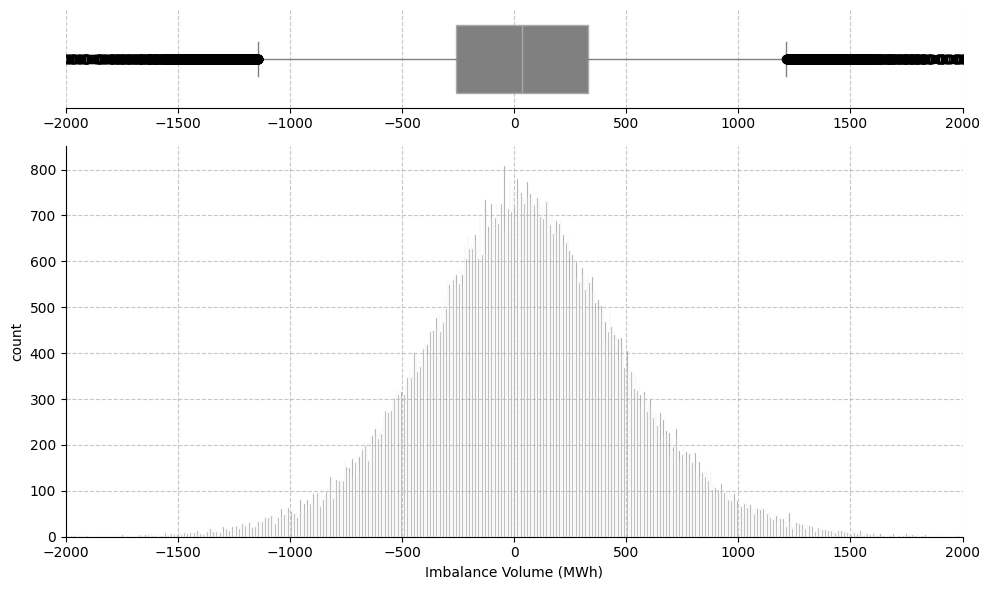

In [ ]:


# Create figure and gridspec for the combined plot
fig = plt.figure(figsize=(10, 6), )
gs = GridSpec(2, 1, height_ratios=[1, 4])

# Top subplot for boxplot
ax_box = fig.add_subplot(gs[0])
ax_box.boxplot(data, vert=False, widths=0.7, 
               patch_artist=True,
               boxprops=dict(facecolor='grey', color='darkgrey'),
               whiskerprops=dict(color='grey'),
               medianprops=dict(color='darkgrey'),
               capprops=dict(color='grey'))
ax_box.set_yticks([])
ax_box.set_xlim(-2000, 2000)
ax_box.grid(True, linestyle='--', alpha=0.7)
ax_box.spines['left'].set_visible(False)
ax_box.spines['right'].set_visible(False)
ax_box.spines['top'].set_visible(False)

# Bottom subplot for histogram
ax_hist = fig.add_subplot(gs[1])
ax_hist.hist(data, bins=1000, color='grey', edgecolor='white', alpha=0.9)
ax_hist.set_xlabel('Imbalance Volume (MWh)')
ax_hist.set_ylabel('count')
ax_hist.set_xlim(-2000, 2000)
ax_hist.grid(True, linestyle='--', alpha=0.7)
ax_hist.spines['right'].set_visible(False)
ax_hist.spines['top'].set_visible(False)



# Adjust layout
plt.tight_layout()
plt.show()


In [30]:
# Compute statistics
stats = {
    "Mean": data.mean().values[0],
    "Standard Deviation": data.std().values[0],
    "Median": data.median().values[0],
    "Minimum": data.min().values[0],
    "Maximum": data.max().values[0],
    "Kurtosis": data.kurtosis().values[0],
    "Skewness": data.skew().values[0],
    
}

# Round the values to 2 decimal places
stats = {key: round(value, 2) for key, value in stats.items()}
stats_df = pd.DataFrame(stats, index=["Imbalance"]).T
stats_df.columns = ["Value"]

# Display the DataFrame
print(stats_df.T)
stats_df.T.to_clipboard(index=False, header=True)

        Mean  Standard Deviation  Median  Minimum  Maximum  Kurtosis  Skewness
Value  36.98              474.66   34.67 -2895.15  3558.84      0.96     -0.01


## Stationary Test

In [61]:
ts = pd.Series(data['Imbalance'])

ts_d = ts.diff().dropna()


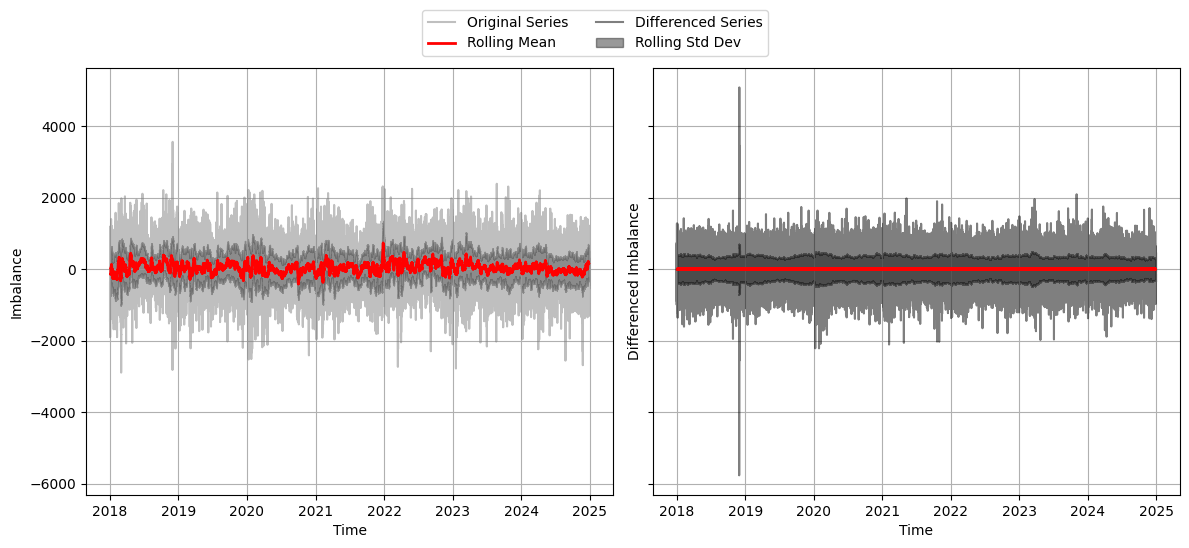

In [75]:
# Compute metrics for the original series

rolling_window = 48 * 7  # 7 days of half hourly data

trend_orig = ts.rolling(window=rolling_window, center=True).mean()
std_orig = ts.rolling(window=rolling_window, center=True).std()

# differentiated series
ts_d = ts.diff().dropna()
trend_diff = ts_d.rolling(window=rolling_window, center=True).mean()
std_diff = ts_d.rolling(window=rolling_window, center=True).std()

fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Original Series
axs[0].plot(ts.index, ts, color='grey', alpha=0.5, label='Original Series')
axs[0].plot(trend_orig.index, trend_orig, color='red', linewidth=2, label='Rolling Mean')
axs[0].fill_between(std_orig.index,
                    trend_orig - std_orig,
                    trend_orig + std_orig,
                    color='black', alpha=0.4, label='Rolling Std Dev')
#axs[0].set_title('Original Series')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Imbalance')
axs[0].grid(True)

# Differentiated Series
axs[1].plot(ts_d.index, ts_d, color='black', alpha=0.5, label='Differenced Series')
axs[1].plot(trend_diff.index, trend_diff, color='red', linewidth=2, label='Rolling Mean')
axs[1].fill_between(std_diff.index,
                    trend_diff - std_diff,
                    trend_diff + std_diff,
                    color='black', alpha=0.4, label='Rolling Std Dev')
#axs[1].set_title('Differentiated Series')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Differenced Imbalance')
axs[1].grid(True)

# collect unique legend entries
handles, labels = [], []
for ax in axs:
    for h, l in zip(*ax.get_legend_handles_labels()):
        if l not in labels:
            handles.append(h)
            labels.append(l)

# swap positions of the 3rd and 4th legend entries
if len(labels) >= 4:
    handles[2], handles[3] = handles[3], handles[2]
    labels[2], labels[3] = labels[3], labels[2]

fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=2, frameon=True)

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries, window=12):
    """
    Plots rolling statistics and performs ADF and KPSS tests on a time series.
    
    Parameters:
    - timeseries: pandas Series with a datetime index.
    - window: integer, the size of the moving window for computing rolling statistics.
    """
    

    # Augmented Dickey-Fuller Test
    print('Results of Augmented Dickey-Fuller Test:')
    adf_result = adfuller(timeseries.dropna(), autolag='AIC')
    adf_output = pd.Series(adf_result[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations'])
    for key, value in adf_result[4].items():
        adf_output[f'Critical Value ({key})'] = value
    print(adf_output)
    
    

# Now run the stationarity test:
test_stationarity(ts_d, window=4)


Results of Augmented Dickey-Fuller Test:
Test Statistic               -62.074769
p-value                        0.000000
#Lags Used                    72.000000
Number of Observations    122566.000000
Critical Value (1%)           -3.430403
Critical Value (5%)           -2.861564
Critical Value (10%)          -2.566783
dtype: float64


C:\Users\Oscar\AppData\Local\Temp\ipykernel_10020\40889333.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_volume = ts.resample('M').sum()  # Use .mean() if you prefer average volume per month


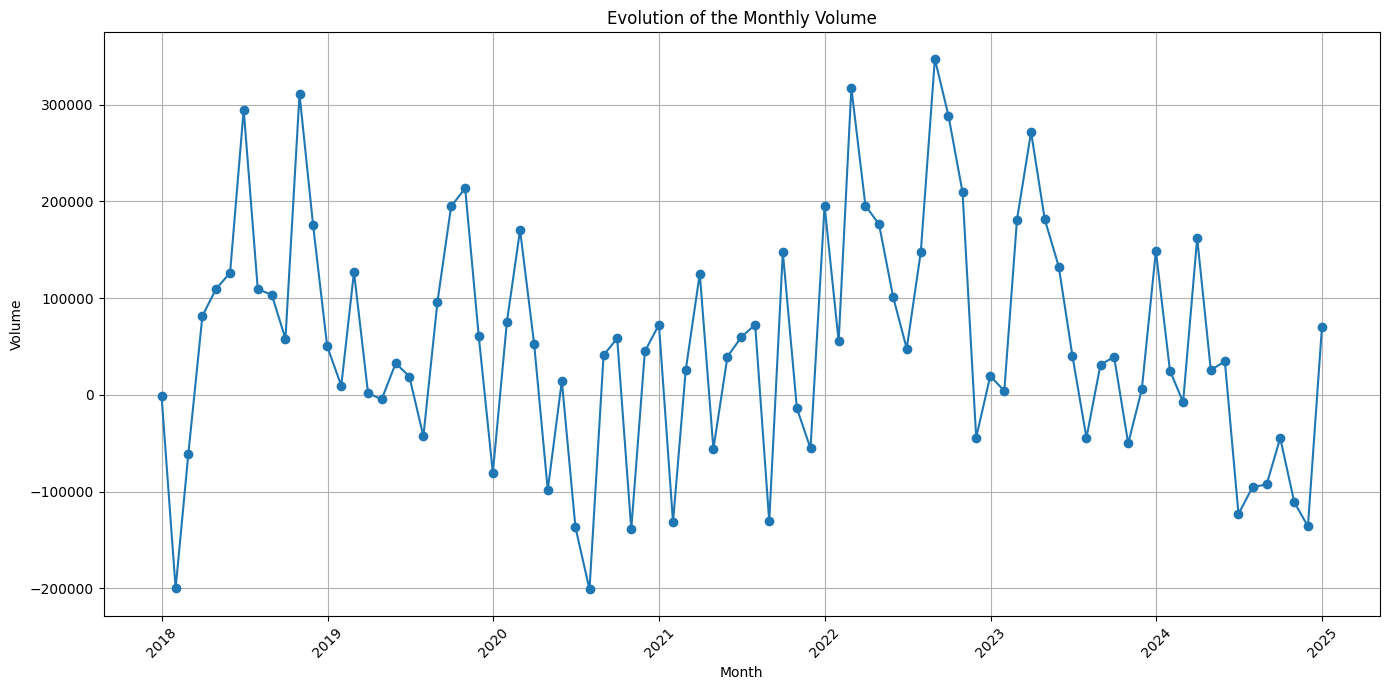

In [ ]:



ts_abs = ts.abs()
# Resample the data to monthly frequency
monthly_volume = ts.resample('M').sum()  # Use .mean() if you prefer average volume per month

# Plot the evolution of the monthly volume
plt.figure(figsize=(14, 7))
plt.plot(monthly_volume.index, monthly_volume.values, marker='o', linestyle='-')
plt.title('Evolution of the Monthly Volume')
plt.xlabel('Month')
plt.ylabel('Volume')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


## ACF plot

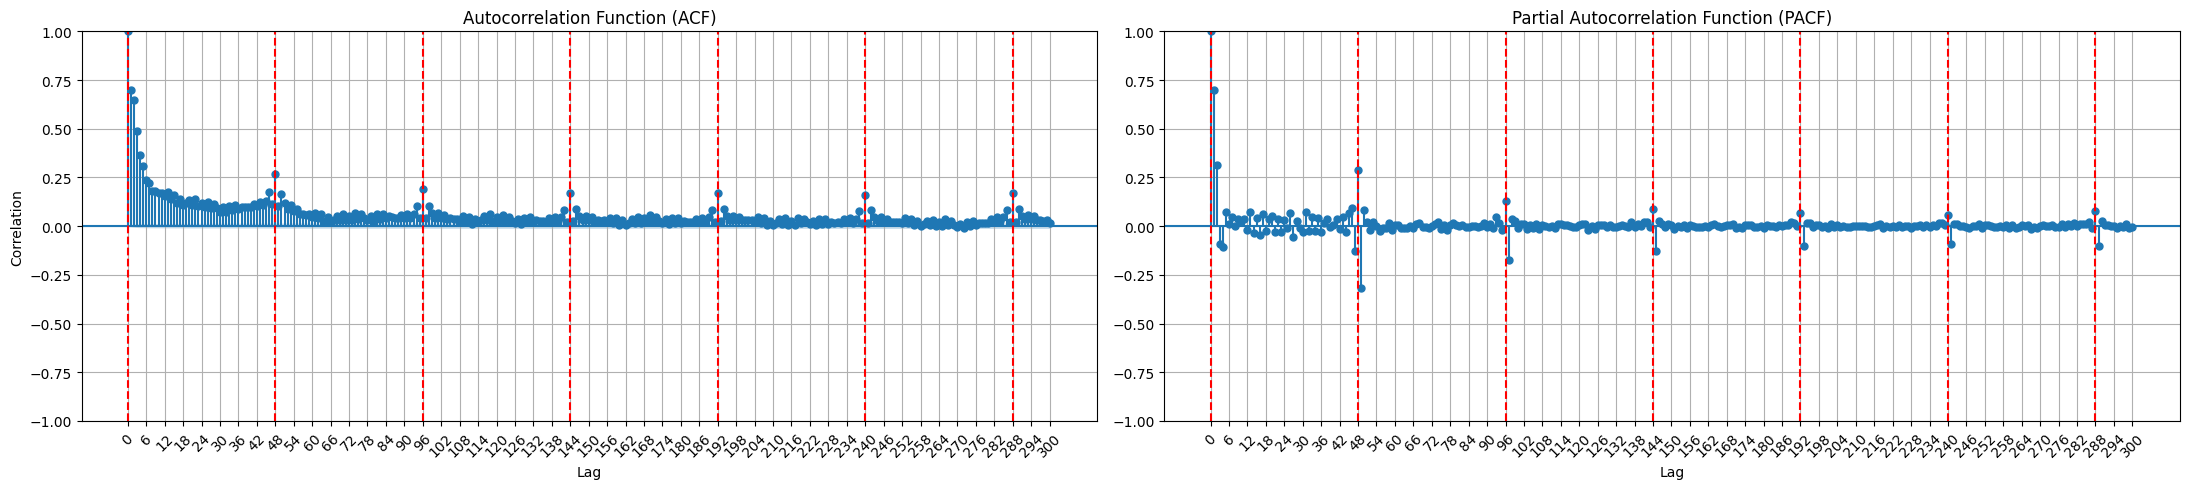

In [ ]:


lags = 300

# Plot ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(22, 5), sharex=True)

# ACF plot
plot_acf(data, lags=lags, ax=axes[0])
axes[0].set_title('Autocorrelation Function (ACF)')

# PACF plot
plot_pacf(data, lags=lags, ax=axes[1], method='ywm')
axes[1].set_title('Partial Autocorrelation Function (PACF)')

for ax in axes:
    for x in range(0, lags + 1, 48):
        ax.axvline(x=x, color='red', linestyle='--')
    plt.setp(ax.get_xticklabels(), rotation=45)
    ax.grid(True)
    ax.set_xticks(np.arange(0, lags+1, 6))

    axes[0].sharey(axes[1])
axes[0].set_xlabel('Lag')
axes[0].set_ylabel('Correlation')
axes[1].set_xlabel('Lag')

plt.tight_layout()
plt.show()

# Average value by time of the day and day

/var/folders/cq/jk_yn95j2ml3m0mccc82f5h80000gn/T/ipykernel_1621/329613816.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(start=start_date, end=end_date, freq='H')
/var/folders/cq/jk_yn95j2ml3m0mccc82f5h80000gn/T/ipykernel_1621/329613816.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=daily_avg.index, y=daily_avg.values, ax=ax1, palette='viridis')


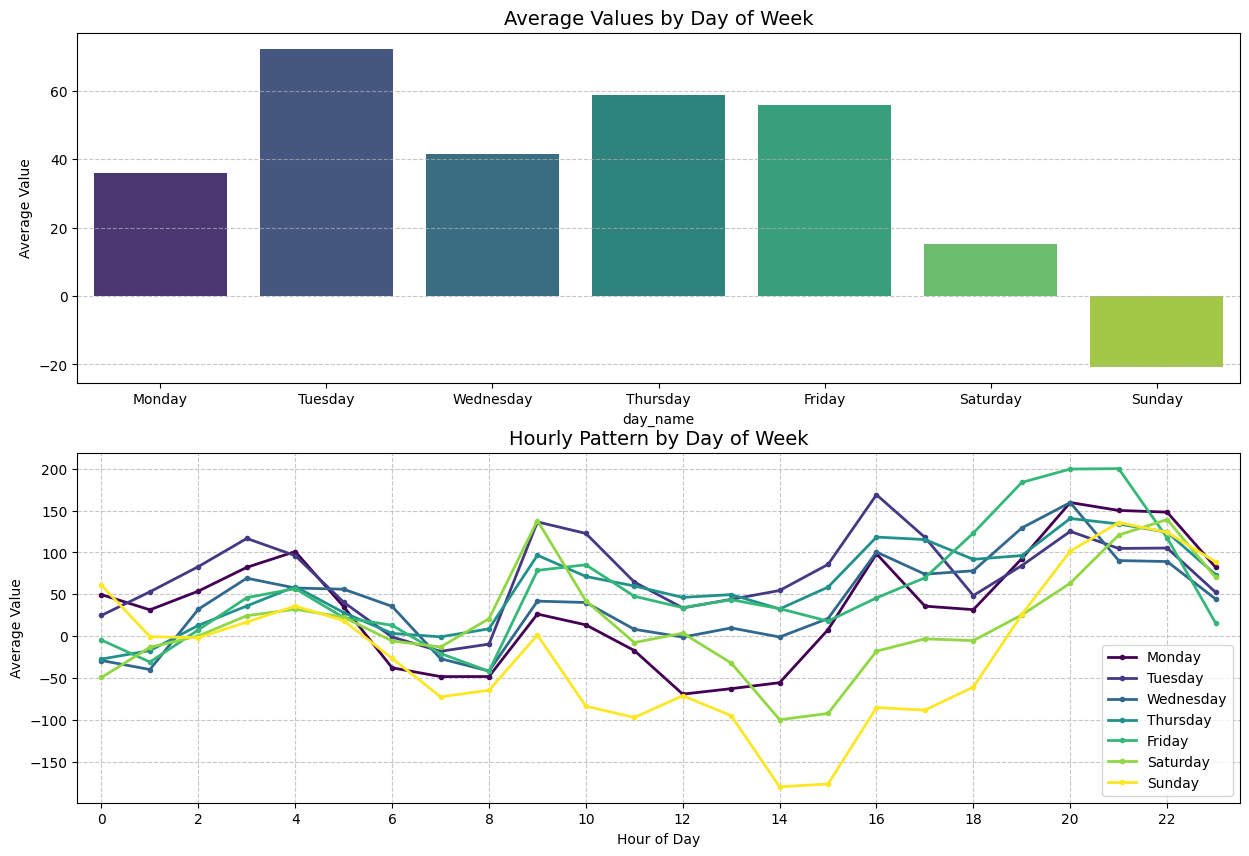

In [ ]:
# Average values by day of week and hour

# Create a DataFrame
df_plt = data.copy()
df_plt.reset_index(inplace=True)

# Add day of week and hour columns
df_plt['day_of_week'] = df_plt['start_date'].dt.dayofweek
df_plt['hour'] = df_plt['start_date'].dt.hour
df_plt['day_name'] = df_plt['start_date'].dt.day_name()
df_plt['day_hour'] = df_plt['day_of_week'] * 24 + df_plt['hour']  # 0-167 for full week hourly pattern

# Calculate weekly averages
# 1. Daily average
daily_avg = df_plt.groupby('day_name')['Imbalance'].mean().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

# 2. Hourly average by day of week (168 points)
hourly_avg = df_plt.groupby(['day_name', 'hour'])['Imbalance'].mean().reset_index()

# Create figure with multiple plots
fig = plt.figure(figsize=(15, 10))

# Plot 1: Daily averages
ax1 = plt.subplot(2, 1, 1)
sns.barplot(x=daily_avg.index, y=daily_avg.values, ax=ax1, palette='viridis')
ax1.set_title('Average Values by Day of Week', fontsize=14)
ax1.set_ylabel('Average Value')
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Plot 2: Hourly pattern for the full week
ax2 = plt.subplot(2, 1, 2)

# Create a colorful plot with each day having a different color
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
colors = plt.cm.viridis(np.linspace(0, 1, 7))

for i, day in enumerate(days):
    day_data = hourly_avg[hourly_avg['day_name'] == day]
    ax2.plot(day_data['hour'], day_data['Imbalance'], 
             label=day, color=colors[i], linewidth=2, marker='o', markersize=3)

ax2.set_title('Hourly Pattern by Day of Week', fontsize=14)
ax2.set_xlabel('Hour of Day')
ax2.set_ylabel('Average Value')
ax2.set_xticks(range(0, 24, 2))
ax2.set_xlim(-0.5, 23.5)
ax2.grid(True, linestyle='--', alpha=0.7)
ax2.legend(loc='best')




## Corelation

In [16]:
correlations = df.corr(method='pearson')
print(correlations['Imbalance'].sort_values(ascending=False).to_string())



Imbalance                                   1.000000
downward_volume_balancing (lag1)            0.418183
WIND DEVIATION CURRENT (lag1)               0.127015
WIND DEVIATION (lag1)                       0.123935
Day-ahead Spot Price                        0.057399
SOLAR DEVIATION (lag1)                      0.049924
SOLAR DEVIATION CURRENT (lag1)              0.047872
GAS -SHARE % (lag1)                         0.032566
SOLAR - SHARE % (lag1)                      0.024530
NUCLEAR - SHARE % (lag1)                    0.016346
WIND - SHARE % (lag1)                       0.013747
SOLAR - CURRENT                             0.003365
SOLAR - ID                                  0.002508
SOLAR - D-1                                 0.001820
CONSUMPTION DEVIATION (lag1)               -0.008645
start_date                                 -0.015480
PROGRAMMABLE RATIO D-1                     -0.015829
AGGREGATED_PROGRAMMABLE_FRANCE - D-1       -0.020700
DA Total Load Forecast                     -0.